# PREPARATION DES DONNEES

## Téléchargement et extraction du dataset
Nous allons commencer par télécharger et extraire le dataset "Stanford Sentiment Treebank". Ce dataset contient des phrases annotées avec des labels de sentiments (allant de 0 à 4).

In [2]:
import pandas as pd
import requests
import zipfile
import os

url = "https://nlp.stanford.edu/sentiment/trainDevTestTrees_PTB.zip"
dataset_path = "../Dataset/trainDevTestTrees_PTB.zip"

# Commençons par télécharger le dataset
response = requests.get(url)
with open(dataset_path, 'wb') as file:
    file.write(response.content)

# Décompression du fichier vers le dossier parent
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("..")


## Chargement des données
Nous allons maintenant charger les fichiers texte du dataset. Chaque ligne du fichier représente une phrase annotée avec un label de sentiment.

In [3]:
# Chargement des données
train_data = pd.read_csv("../Dataset/trees/train.txt", delimiter="\t", header=None, names=["Sentence"])
dev_data = pd.read_csv("../Dataset/trees/dev.txt", delimiter="\t", header=None, names=["Sentence"])
test_data = pd.read_csv("../Dataset/trees/test.txt", delimiter="\t", header=None, names=["Sentence"])

# Afficher quelques exemples de données
print("Exemples de données d'entraînement :")
print(train_data.head())

Exemples de données d'entraînement :
                                            Sentence
0  (3 (2 (2 The) (2 Rock)) (4 (3 (2 is) (4 (2 des...
1  (4 (4 (4 (2 The) (4 (3 gorgeously) (3 (2 elabo...
2  (3 (3 (2 (2 (2 (2 (2 Singer\/composer) (2 (2 B...
3  (2 (2 (2 You) (2 (2 'd) (2 (2 think) (2 (2 by)...
4  (3 (2 Yet) (3 (2 (2 the) (2 act)) (3 (4 (3 (2 ...


## Extraction des labels et des phrases
Les données du Stanford Sentiment Treebank sont dans un format spécial où chaque phrase est encadrée par des parenthèses et annotée avec un label. Nous devons extraire ces informations.

In [4]:
import re

# Fonction pour extraire le label et la phrase
def extract_label(sentence):
    match = re.match(r'\((\d) (.+)\)', sentence)
    if match:
        return int(match.group(1)), match.group(2)
    return None, sentence

# Appliquer l'extraction des étiquettes
train_data["Label"], train_data["Sentence"] = zip(*train_data["Sentence"].apply(extract_label))
dev_data["Label"], dev_data["Sentence"] = zip(*dev_data["Sentence"].apply(extract_label))
test_data["Label"], test_data["Sentence"] = zip(*test_data["Sentence"].apply(extract_label))

## Vérification des données extraites

In [5]:
print(train_data.head())
print(dev_data.head())
print(test_data.head())

                                            Sentence  Label
0  (2 (2 The) (2 Rock)) (4 (3 (2 is) (4 (2 destin...      3
1  (4 (4 (2 The) (4 (3 gorgeously) (3 (2 elaborat...      4
2  (3 (2 (2 (2 (2 (2 Singer\/composer) (2 (2 Brya...      3
3  (2 (2 You) (2 (2 'd) (2 (2 think) (2 (2 by) (2...      2
4  (2 Yet) (3 (2 (2 the) (2 act)) (3 (4 (3 (2 is)...      3
                                            Sentence  Label
0  (2 It) (4 (4 (2 's) (4 (3 (2 a) (4 (3 lovely) ...      3
1  (2 (1 No) (2 one)) (1 (1 (2 goes) (2 (1 (2 (2 ...      2
2  (2 And) (4 (3 (2 if) (1 (2 you) (1 (2 (2 (2 'r...      3
3  (4 (2 A) (4 (3 (3 warm) (2 ,)) (3 funny))) (3 ...      4
4  (3 (2 Uses) (3 (3 (4 (3 sharp) (4 (3 (4 humor)...      4
                                            Sentence  Label
0  (3 (3 Effective) (2 but)) (1 (1 too-tepid) (2 ...      2
1  (3 (2 If) (3 (2 you) (3 (2 sometimes) (2 (2 li...      3
2  (4 (4 (3 (2 Emerges) (3 (2 as) (3 (2 something...      4
3  (2 (2 The) (2 film)) (3 (3 (3 (3 prov

# PREPARATION DES DONNEES POUR LA MODELISATION

## Encodage des phrases
Nous allons utiliser le CountVectorizer de scikit-learn pour transformer les phrases en vecteurs de caractéristiques.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le vectorizer
vectorizer = CountVectorizer()

# Ajuster et transformer les données
X_train = vectorizer.fit_transform(train_data["Sentence"]).toarray()
X_dev = vectorizer.transform(dev_data["Sentence"]).toarray()
X_test = vectorizer.transform(test_data["Sentence"]).toarray()

## Préparation des labels
Nous devons également préparer les labels pour notre modèle.

In [7]:
y_train = train_data["Label"].values
y_dev = dev_data["Label"].values
y_test = test_data["Label"].values

# ENTRAINEMENT DU MODELE

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
model = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Évaluer le modèle sur les données de validation
y_pred_dev = model.predict(X_dev)
print("Accuracy sur les données de validation:", accuracy_score(y_dev, y_pred_dev))
print("Rapport de classification:\n", classification_report(y_dev, y_pred_dev))

Accuracy sur les données de validation: 0.3605812897366031
Rapport de classification:
               precision    recall  f1-score   support

           0       0.32      0.22      0.26       139
           1       0.40      0.46      0.43       289
           2       0.29      0.22      0.25       229
           3       0.37      0.47      0.41       279
           4       0.36      0.33      0.34       165

    accuracy                           0.36      1101
   macro avg       0.35      0.34      0.34      1101
weighted avg       0.35      0.36      0.35      1101



# EVALUATION FINALE SUR LES DONNEES DE TEST

In [9]:
# Évaluer le modèle sur les données de test
y_pred_test = model.predict(X_test)
print("Accuracy sur les données de test:", accuracy_score(y_test, y_pred_test))
print("Rapport de classification:\n", classification_report(y_test, y_pred_test))

Accuracy sur les données de test: 0.4
Rapport de classification:
               precision    recall  f1-score   support

           0       0.35      0.25      0.29       279
           1       0.45      0.48      0.47       633
           2       0.24      0.23      0.24       389
           3       0.37      0.48      0.42       510
           4       0.57      0.43      0.49       399

    accuracy                           0.40      2210
   macro avg       0.40      0.38      0.38      2210
weighted avg       0.41      0.40      0.40      2210



# AFFINAGE ET AMELIORATION DU MODELE
Maintenant que nous avons un modèle de base, nous pouvons explorer quelques techniques pour améliorer les performances.

## Ajustement des hyperparamètres
La régression logistique a plusieurs hyperparamètres que nous pouvons ajuster. Nous allons utiliser la validation croisée pour trouver les meilleurs hyperparamètres.

In [11]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Initialiser la recherche par validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Effectuer la recherche sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés:", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs hyperparamètres trouvés: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


## Réentraînement du modèle avec les meilleurs hyperparamètres trouvés

In [12]:
# Initialiser le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_

# Entraîner le modèle sur les données d'entraînement
best_model.fit(X_train, y_train)

# Évaluer le modèle sur les données de validation
y_pred_dev = best_model.predict(X_dev)
print("Accuracy sur les données de validation avec les meilleurs hyperparamètres:", accuracy_score(y_dev, y_pred_dev))
print("Rapport de classification:\n", classification_report(y_dev, y_pred_dev))

Accuracy sur les données de validation avec les meilleurs hyperparamètres: 0.37783832879200724
Rapport de classification:
               precision    recall  f1-score   support

           0       0.39      0.10      0.16       139
           1       0.40      0.60      0.48       289
           2       0.27      0.11      0.16       229
           3       0.37      0.58      0.45       279
           4       0.43      0.24      0.31       165

    accuracy                           0.38      1101
   macro avg       0.37      0.33      0.31      1101
weighted avg       0.37      0.38      0.34      1101



# EVALUATION FINALE SUR LES DONNEES DE TEST

In [13]:
# Évaluer le modèle sur les données de test
y_pred_test = best_model.predict(X_test)
print("Accuracy sur les données de test avec les meilleurs hyperparamètres:", accuracy_score(y_test, y_pred_test))
print("Rapport de classification:\n", classification_report(y_test, y_pred_test))

Accuracy sur les données de test avec les meilleurs hyperparamètres: 0.4
Rapport de classification:
               precision    recall  f1-score   support

           0       0.44      0.14      0.21       279
           1       0.43      0.59      0.50       633
           2       0.25      0.13      0.17       389
           3       0.36      0.60      0.45       510
           4       0.60      0.29      0.39       399

    accuracy                           0.40      2210
   macro avg       0.42      0.35      0.34      2210
weighted avg       0.41      0.40      0.37      2210



# ANALYSE DES RESULTATS
Nous allons analyser les résultats pour comprendre comment le modèle se comporte sur les différentes classes de sentiments.

## Matrice de confusion
La matrice de confusion nous permet de visualiser les performances du modèle en termes de faux positifs, faux négatifs, vrais positifs et vrais négatifs.

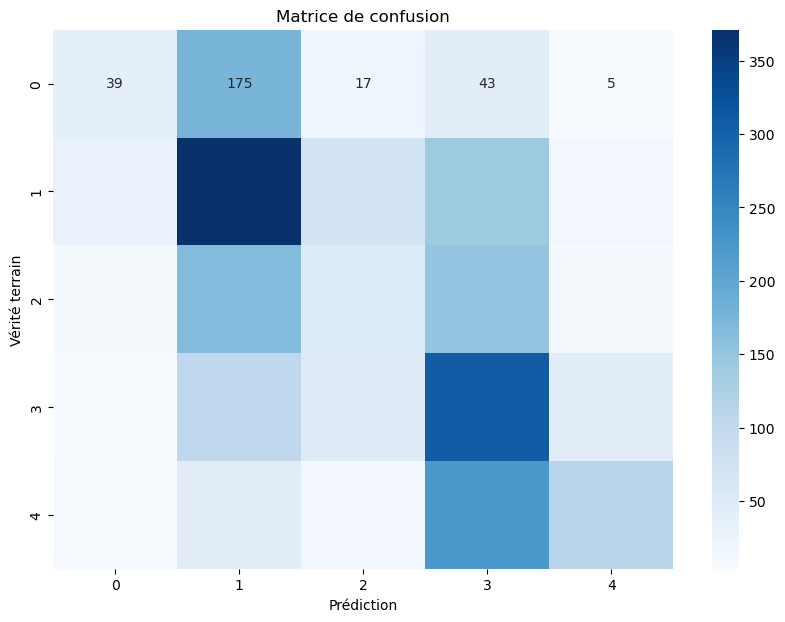

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

# SAUVEGARDE DU MODELE
Enfin, nous allons sauvegarder le modèle entraîné pour une utilisation future.

In [15]:
import joblib

# Sauvegarder le modèle
joblib.dump(best_model, 'sentiment_analysis_model.pkl')

['sentiment_analysis_model.pkl']